21:21:18 - cmdstanpy - INFO - Chain [1] start processing
21:21:18 - cmdstanpy - INFO - Chain [1] done processing


Linear Regression - MAE: 0.2868, RMSE: 0.3484
ARIMA - MAE: 0.0794, RMSE: 0.0977
SARIMA - MAE: 0.0796, RMSE: 0.1028
Prophet - MAE: 0.0717, RMSE: 0.0908


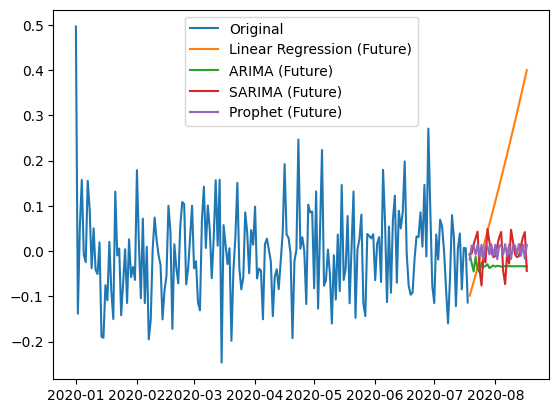

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from forecasting import linear_regression_forecast, arima_forecast, sarima_forecast, prophet_forecast, calculate_errors

# データの準備
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=200, freq='D')
data = np.random.randn(200)  # ランダムウォーク
for i, d in enumerate(data):
    if i > 1:
        data[i] = data[i] * 0.1 + data[i-1] * 0.1
df = pd.DataFrame({'ds': date_range, 'y': data})

# データをトレーニングとテストに分割
df['diff'] = df['y'].diff().fillna(0)
df['day'] = np.arange(len(df))

X = df[['day']]
y = df['diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# 予測の実行
future_steps = 30
y_pred_lr, future_dates_lr, future_preds_lr = linear_regression_forecast(df, X_train, X_test, y_train, y_test, future_steps)
y_pred_arima, future_dates_arima, future_preds_arima = arima_forecast(df, y_test, future_steps)
y_pred_sarima, future_dates_sarima, future_preds_sarima = sarima_forecast(df, y_test, future_steps)
y_pred_prophet, future_dates_prophet, future_preds_prophet = prophet_forecast(df, y_test, future_steps)

# 誤差の計算
mae_lr, rmse_lr = calculate_errors(df['y'].iloc[-len(y_test):], y_pred_lr)
mae_arima, rmse_arima = calculate_errors(df['y'].iloc[-len(y_test):], y_pred_arima)
mae_sarima, rmse_sarima = calculate_errors(df['y'].iloc[-len(y_test):], y_pred_sarima)
mae_prophet, rmse_prophet = calculate_errors(df['y'].iloc[-len(y_test):], y_pred_prophet)

# 結果を表示
print("Linear Regression - MAE: {:.4f}, RMSE: {:.4f}".format(mae_lr, rmse_lr))
print("ARIMA - MAE: {:.4f}, RMSE: {:.4f}".format(mae_arima, rmse_arima))
print("SARIMA - MAE: {:.4f}, RMSE: {:.4f}".format(mae_sarima, rmse_sarima))
print("Prophet - MAE: {:.4f}, RMSE: {:.4f}".format(mae_prophet, rmse_prophet))

# 予測結果を可視化
def plot_forecasts(df, future_steps):
    plt.plot(df['ds'], df['y'], label='Original')

    # 線形回帰
    plt.plot(future_dates_lr, future_preds_lr, label='Linear Regression (Future)')
    
    # ARIMA
    plt.plot(future_dates_arima, future_preds_arima, label='ARIMA (Future)')
    
    # SARIMA
    plt.plot(future_dates_sarima, future_preds_sarima, label='SARIMA (Future)')
    
    # Prophet
    plt.plot(future_dates_prophet, future_preds_prophet, label='Prophet (Future)')
    
    plt.legend()
    plt.show()

# 可視化を実行
plot_forecasts(df, future_steps)
